# Ekko

The data I chose is employment, and my indicator is to find the communities with the highest number of employees. I used the census method to compile the first ten rows of data to count them. Then I will find out what the communities with the highest employment population and the occupations with the highest employment are, and in which communities they are distributed.

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("employment.csv")

# Display the first 10 rows and ensure we have 35 columns
df.head(10)

,Neighborhood,Sector #,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.),Resident Jobs: Construction,Resident Jobs: Manufacturing,Resident Jobs: Retail Trade,"Resident Jobs: Transportation, warehousing, utilities",Resident Jobs: Information,"Resident Jobs: Finance, insurance, real estate",...,Jobs in 'Hood: Manufacturing,Jobs in 'Hood: Retail trade,"Jobs in 'Hood: Transport, warehousing, utilities",Jobs in 'Hood: Information,"Jobs in 'Hood: Finance, insurance, real estate","Jobs in 'Hood: Prof, scientific, admin, and waste mgmt","Jobs in 'Hood: Educ, health, and social svc","Jobs in 'Hood: Arts, ent, recreation, accommodation and food services",Jobs in 'Hood: Public admin,Jobs in 'Hood: Other
0,Allegheny Center,3,933,386,3.1%,1.8%,11.9%,0.0%,0.0%,10.4%,...,9.4%,1.8%,7.7%,8.5%,21.3%,9.3%,25.8%,6.7%,2.0%,4.4%
1,Allegheny West,3,462,151,0.0%,6.6%,0.0%,14.6%,0.0%,0.0%,...,12.4%,3.1%,0.3%,0.8%,6.6%,3.9%,48.7%,4.6%,1.9%,16.6%
2,Allentown,6,"2,500",858,4.2%,7.8%,11.9%,5.6%,2.3%,8.4%,...,0.0%,31.0%,8.5%,0.0%,4.2%,8.5%,14.1%,8.5%,2.8%,15.5%
3,Arlington,7,"1,869",685,7.2%,13.0%,12.3%,1.8%,5.0%,0.9%,...,6.5%,0.0%,0.0%,6.5%,0.0%,0.0%,64.5%,0.0%,0.0%,6.5%
4,Arlington Heights,7,244,72,0.0%,0.0%,13.9%,0.0%,0.0%,29.2%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%
5,Banksville,5,"4,144","2,532",5.4%,4.9%,11.1%,1.9%,1.8%,10.7%,...,7.3%,17.4%,0.0%,4.1%,5.4%,8.4%,23.7%,12.8%,0.2%,15.8%
6,Bedford Dwellings,15,"1,202",358,0.0%,7.5%,0.0%,12.3%,0.0%,2.8%,...,11.8%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,88.2%,0.0%,0.0%
7,Beechview,5,"7,974","4,096",5.6%,5.9%,11.8%,2.8%,2.7%,7.7%,...,4.0%,22.0%,4.0%,0.5%,3.7%,8.4%,17.6%,8.9%,2.8%,13.1%
8,Beltzhoover,6,"1,925",706,0.0%,1.3%,13.6%,10.6%,7.6%,15.0%,...,12.2%,2.4%,37.7%,2.4%,1.0%,13.4%,21.9%,1.0%,1.0%,4.6%
9,Bloomfield,12,"8,442","5,227",3.0%,4.9%,8.7%,1.8%,3.6%,3.8%,...,4.1%,12.5%,2.1%,1.9%,4.1%,4.5%,49.4%,10.1%,1.2%,7.9%


We can clearly see the employment population information and the employment probability of each occupation.

In [7]:


# Calculating the mean employment rate for each occupation in the subset
mean_employment_rates = df_subset[employment_columns].mean()

# Sorting the mean employment rates
sorted_employment_rates = mean_employment_rates.sort_values()

# Extracting the highest, middle, and lowest employment rate occupations
occupation_highest_employment_subset = sorted_employment_rates.idxmax()
highest_rate = sorted_employment_rates.max()

# Middle occupation might need a more nuanced approach depending on the number of occupations
if len(sorted_employment_rates) % 2 == 0: # Even number of elements
    middle_index1 = len(sorted_employment_rates) // 2 - 1
    middle_index2 = len(sorted_employment_rates) // 2
    occupation_middle_employment_subset = sorted_employment_rates.iloc[[middle_index1, middle_index2]].index.tolist()
    middle_rate = sorted_employment_rates.iloc[[middle_index1, middle_index2]].mean()
else: # Odd number of elements
    middle_index = len(sorted_employment_rates) // 2
    occupation_middle_employment_subset = sorted_employment_rates.index[middle_index]
    middle_rate = sorted_employment_rates.iloc[middle_index]

occupation_lowest_employment_subset = sorted_employment_rates.idxmin()
lowest_rate = sorted_employment_rates.min()

occupation_highest_employment_subset, highest_rate, occupation_middle_employment_subset, middle_rate, occupation_lowest_employment_subset, lowest_rate


('Resident Jobs: Educ, health and social svc',
 0.3001,
 'Resident Jobs: Prof, scientific, admin, and waste mgmt',
 0.08199999999999999,
 'Resident Jobs: Information',
 0.023)

These data first let us know the occupations with the highest, medium and lowest employment probability.

In [31]:
import pandas as pd

# Load your data
df = pd.read_csv('employment.csv')

# Prepare the data: Convert necessary columns
df['Population (2010)'] = df['Population (2010)'].str.replace(',', '').astype(int)
df_first_10 = df.iloc[:10].copy()

# Convert job categories from percentage to absolute numbers
job_categories = [col for col in df_first_10.columns if 'Resident Jobs:' in col]
for category in job_categories:
    df_first_10[category] = df_first_10[category].str.rstrip('%').astype(float) / 100 * df_first_10['Population (2010)']

# Find the job category with the highest total employment
total_employment_by_category = df_first_10[job_categories].sum(axis=0)
highest_employment_category = total_employment_by_category.idxmax()

# Identify the neighborhood with the highest employment in that category
highest_employment_in_category_value = df_first_10[highest_employment_category].max()
target_neighborhood_index = df_first_10[df_first_10[highest_employment_category] == highest_employment_in_category_value].index[0]
target_neighborhood_name = df_first_10.loc[target_neighborhood_index, 'Neighborhood']
target_neighborhood_employment_rate = highest_employment_in_category_value / df_first_10.loc[target_neighborhood_index, 'Population (2010)']

# Calculate the same for the four surrounding neighborhoods
# Safely select two neighborhoods before and after the target, handling edges of the DataFrame
start_index = max(target_neighborhood_index - 2, 0)
end_index = min(target_neighborhood_index + 3, len(df_first_10))
surrounding_neighborhoods = df_first_10.iloc[start_index:end_index].copy()
surrounding_neighborhoods_excluding_target = surrounding_neighborhoods[surrounding_neighborhoods.Neighborhood != target_neighborhood_name]

# Display the results
print(f"Top Employment Category: {highest_employment_category}")
print(f"Neighborhood with Highest Employment in this Category: {target_neighborhood_name} with an employment rate of {target_neighborhood_employment_rate:.2%}")
print("\nSurrounding Neighborhoods' Employment in this Category:")
for idx, row in surrounding_neighborhoods_excluding_target.iterrows():
    neighborhood_name = row['Neighborhood']
    population = row['Population (2010)']
    employment_in_category = row[highest_employment_category]
    employment_rate_in_category = employment_in_category / population
    print(f"{neighborhood_name}: Employment Rate: {employment_rate_in_category:.2%}")


Top Employment Category: Resident Jobs: Educ, health and social svc
Neighborhood with Highest Employment in this Category: Bloomfield with an employment rate of 36.20%

Surrounding Neighborhoods' Employment in this Category:
Beechview: Employment Rate: 25.20%
Beltzhoover: Employment Rate: 22.20%


Through this, we can know which community has the highest employment occupation population and its employment probability. It is Bloomfield, and we can also know that its Educ, health and social SVC is much more developed than other communities.

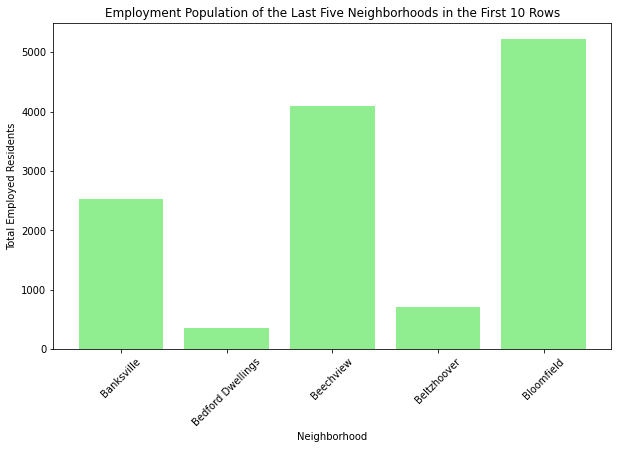

In [25]:
# Select the last five neighborhoods from the first 10 rows
last_five_neighborhoods = df_first_10.iloc[-5:]

# Plotting the bar chart for the last five neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(last_five_neighborhoods['Neighborhood'], last_five_neighborhoods['Total Age 16+ N\'hood Residents Employed (2010 Est.)'], color='lightgreen')
plt.xlabel('Neighborhood')
plt.ylabel('Total Employed Residents')
plt.title('Employment Population of the Last Five Neighborhoods in the First 10 Rows')
plt.xticks(rotation=45)
plt.show()



I used a bar chart to show the five communities with the largest employment population. It is obvious that Bloomfield has the most.

Conclusion：
After comparing multiple sets of data, it is concluded that Bloomfield is the best community, and its educational resources are also very sufficient compared to other communities, which they cannot compare with.